## Experimenting with ML Classification Algorithms

Real-World Use Cases: Predictive Maintenance in Manufacturing, Financial Risk Assessment and Medical Diagnosis.

In this notebook I explore and compare different classifiers on different synthetic binary-labelled datasets:
1. The first dataset is two interleaving half circles made with the ```make_moons()``` to achieve a ying-yang type of shape.
2. The second dataset is a large circle containing a smaller circle in 2d using ```make_circles()```
3. The third is a linearly separable dataset using ```make_classification()``` and adding random noise.


In [10]:
### Importing necessary libraries

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [30]:
# create perfectly linearly separable dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)

# now we add some noise to make the problem a bit harder
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

# save linearly separeable and create two more datasets
datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

###  Definition of classifiers
We will compare a number of popular mostly tree-based classifiers on all three datasets. 

We will implement the following classifiers:
1. Decision Tree: For the decision tree we choose a conservative max depth of 3 to prevent overfitting.
2. Random Forrest: For the random forrest we choose the same max depth of 3 like for the trees, but restrict the number of trees to 10. We also restrict each tree to form its decision boundaries on only one input feature.
3. AdaBoost Tree: This method combines a number of weak trees by iteratively (re-) weighting them. 
4. K-Nearest Neighbor: This classifier simply searches for every input point the color of the K-nearest neighbours. We will set K = 3.

In [34]:
### Defining the classifiers

names = [
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
]

# hyperparamatertuning
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    AdaBoostClassifier(random_state=42),
]

### Results

Below we plot the results of our chosen classifiers on the different synthetic datasets. For that we first show the input data. Here we color the training plots with solid colors and the testing points with slightly transparent colors. Before we apply our classifiers we standardize all input data to mean zero and unit variance.

We have also printed the accuracy on the test data on the bottom right of each plot. The 3-nearest neighbour algorithm performs the strongest on all three data sets. Surprisingly, the random forrest and decision tree perform equally well on all three data sets. This can be further explored by hyperparameter tuning. AdaBoost performs best from the tree-based algorithms, especially, for the circles data set.

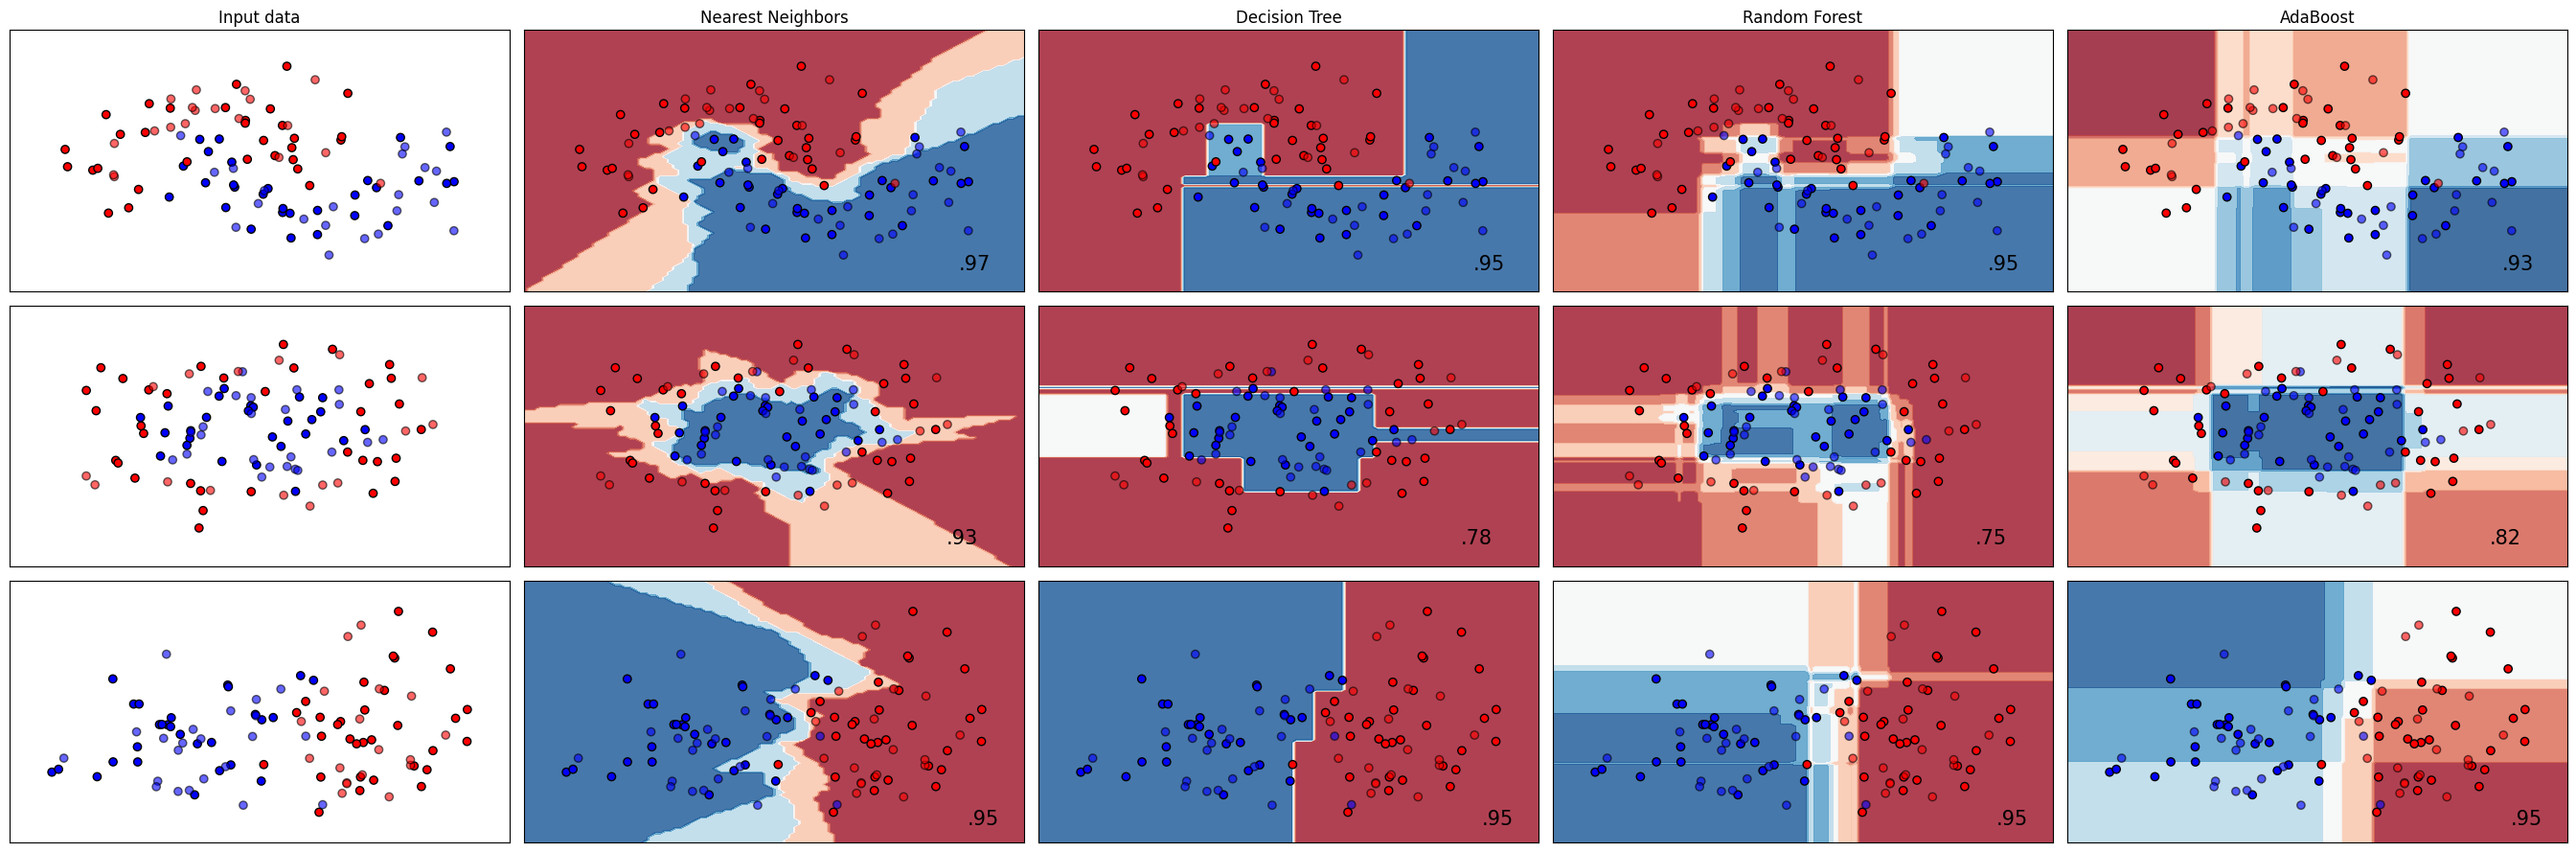

In [35]:
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()
